# Aprendizado Supervisionado no Neurônio Perceptron

In [1]:
# Importando as ferramentas

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn import metrics
import math

##  Parte I– Resolvendo um Problema Linearmente Separável


1. Usar o arquivo dataAll.txt
2. Construir o algoritmo de treinamento do neurônio perceptron.

In [3]:
arq_input = "dataAll.txt"

dataAll = np.fromfile(arq_input, dtype=np.float64)
print("Tipo de dataAll: {}".format(type(dataAll)))
print("Número de elementos em dataAll: {}".format(dataAll.size))
print("\n")


# -1 infers the size of the new dimension from the size of the input array.
dataAll = np.reshape(dataAll, (-1, 3))
print(dataAll[:10]) # Mostrando 10 exemplos

print("\n")
print("Shape de dataAll: {}".format(dataAll.shape))
print("Dimensões de dataAll: {}".format(dataAll.ndim))

Tipo de dataAll: <class 'numpy.ndarray'>
Número de elementos em dataAll: 3000


[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]
 [ -87.6395 -306.9783    1.    ]
 [-172.0622 -500.5087    1.    ]
 [ 727.9602  358.2956    1.    ]
 [ 752.3574  268.3682    1.    ]
 [ 685.6276 -833.4677    1.    ]]


Shape de dataAll: (1000, 3)
Dimensões de dataAll: 2


Como havia 3000 exemplos anteriormente e agora a matriz tem dimensões (1, 3). 
Então, há 3000/3 = 1000 exemplos em dataAll. Ou seja, (1000, 1, 3).

In [5]:
# Separando em x, y e rotulo 

print("x1:")
x = dataAll[:,:1]
print(x[:10]) # Mostrando os 10 primeiros pontos e sua coordenada no eixo x
print("\n")

print("y:")
y = dataAll[:,1:2]
print(y[:10]) # Mostrando os 10 primeiros pontos e sua coordenada no eixo y
print("\n")

print("Rótulo:")
rotulo = dataAll[:,2:].astype(int)
print(rotulo[:10]) # Rótulos dos pontos

x1:
[[-363.7884]
 [ 328.7572]
 [-164.9827]
 [ 536.5905]
 [ 314.2297]
 [ -87.6395]
 [-172.0622]
 [ 727.9602]
 [ 752.3574]
 [ 685.6276]]


y:
[[ 244.1423]
 [-256.7658]
 [ 613.2164]
 [ 764.9575]
 [ 343.8375]
 [-306.9783]
 [-500.5087]
 [ 358.2956]
 [ 268.3682]
 [-833.4677]]


Rótulo:
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


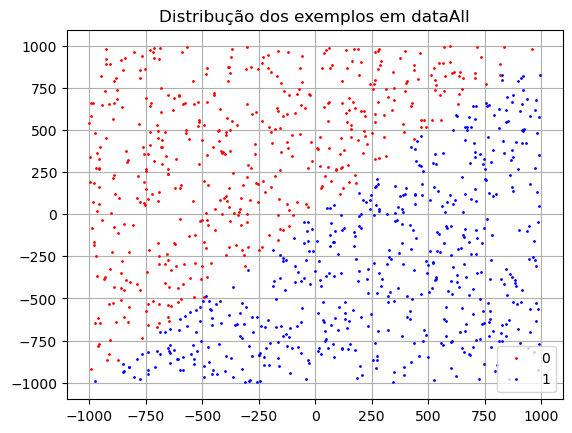

In [6]:
def show_data(x, y, title):
    fig, ax = plt.subplots()

    cor = {0: 'red', 1:'blue'}
    for i in range(x.size):
        plt.plot(x[i], y[i], marker='o', linestyle='', markersize=1, c = cor[rotulo[i][0]])

    ax.legend(cor)
    ax.grid(True)
    ax.set_title(title)
    plt.show()
    
show_data(x, y, "Distribução dos exemplos em dataAll")

In [ ]:
print("OI RITA")